<a href="https://colab.research.google.com/github/akanksha2605/LetsGrowMore_Task-2/blob/main/Task_2_LetsGrowMore_Akanksha_Dhote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LetsGrowMore**

#**Data Science**
**Task-2:** Prediction using Decision Tree Algorithm                             
Author: **Akanksha Rajendra Dhote**

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [2]:
iris = load_iris()
x = iris.data[:,:]
y = iris.target

**Input Data**

In [3]:
df = pd.DataFrame(iris['data'],columns=['Petal length','Petal width','Sepal length','Sepal width'])
df['Species'] = iris['target']
df['Species'] = df['Species'].apply(lambda x: iris['target_names'][x])

df.head()

,Petal length,Petal width,Sepal length,Sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Size of the Data**

In [5]:
df.shape


(150, 5)

In [6]:
df.describe()

,Petal length,Petal width,Sepal length,Sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**EDA**

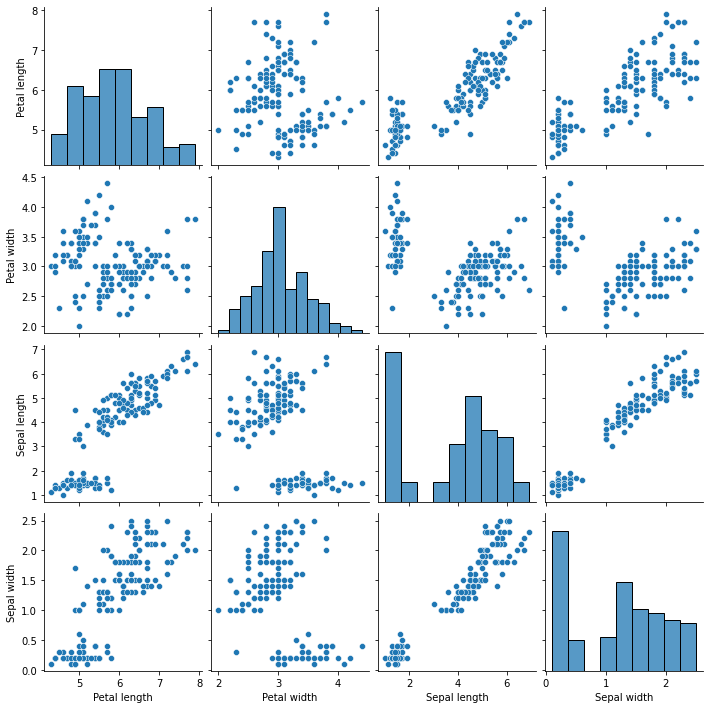

In [7]:
sns.pairplot(df)

**Scatter plot based on the features of species**

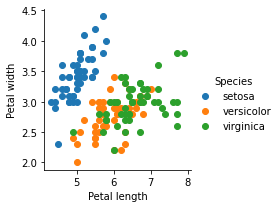

In [9]:
sns.FacetGrid(df, hue ='Species').map(plt.scatter,'Petal length','Petal width').add_legend()
plt.show()

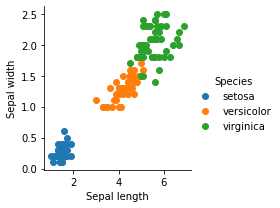

In [10]:
sns.FacetGrid(df, hue ='Species').map(plt.scatter,'Sepal length','Sepal width').add_legend()
plt.show()

**Data Preprocessing**

In [11]:
x= df.iloc[:,[0,1,2,3]]
y= df.Species

**Splitting the data in training and testing set**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
print("Training complete")

y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

Training complete


**For Training Set**

In [14]:
accuracy_score(y_train,y_pred_train)

1.0

**For Testing Set**

In [15]:
accuracy_score(y_test, y_pred)

0.8666666666666667

**Comparing the actual and predicted classification**

In [17]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.tail()

,Actual,Predicted
47,setosa,setosa
135,virginica,virginica
82,versicolor,versicolor
81,versicolor,versicolor
34,setosa,setosa


**Visualizing the decision tree**

[Text(1464.75, 1956.96, 'X[2] <= 2.45\nentropy = 1.58129\nsamples = 120\nvalue = [42, 36, 42]'),
 Text(976.5, 1522.0800000000002, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(1953.0, 1522.0800000000002, 'X[2] <= 4.75\nentropy = 0.99573\nsamples = 78\nvalue = [0, 36, 42]'),
 Text(976.5, 1087.2, 'X[3] <= 1.65\nentropy = 0.18718\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(488.25, 652.3200000000002, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(1464.75, 652.3200000000002, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(2929.5, 1087.2, 'X[2] <= 4.95\nentropy = 0.27139\nsamples = 43\nvalue = [0, 2, 41]'),
 Text(2441.25, 652.3200000000002, 'X[1] <= 3.05\nentropy = 0.9183\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(1953.0, 217.44000000000005, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(2929.5, 217.44000000000005, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(3417.75, 652.3200000000002, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

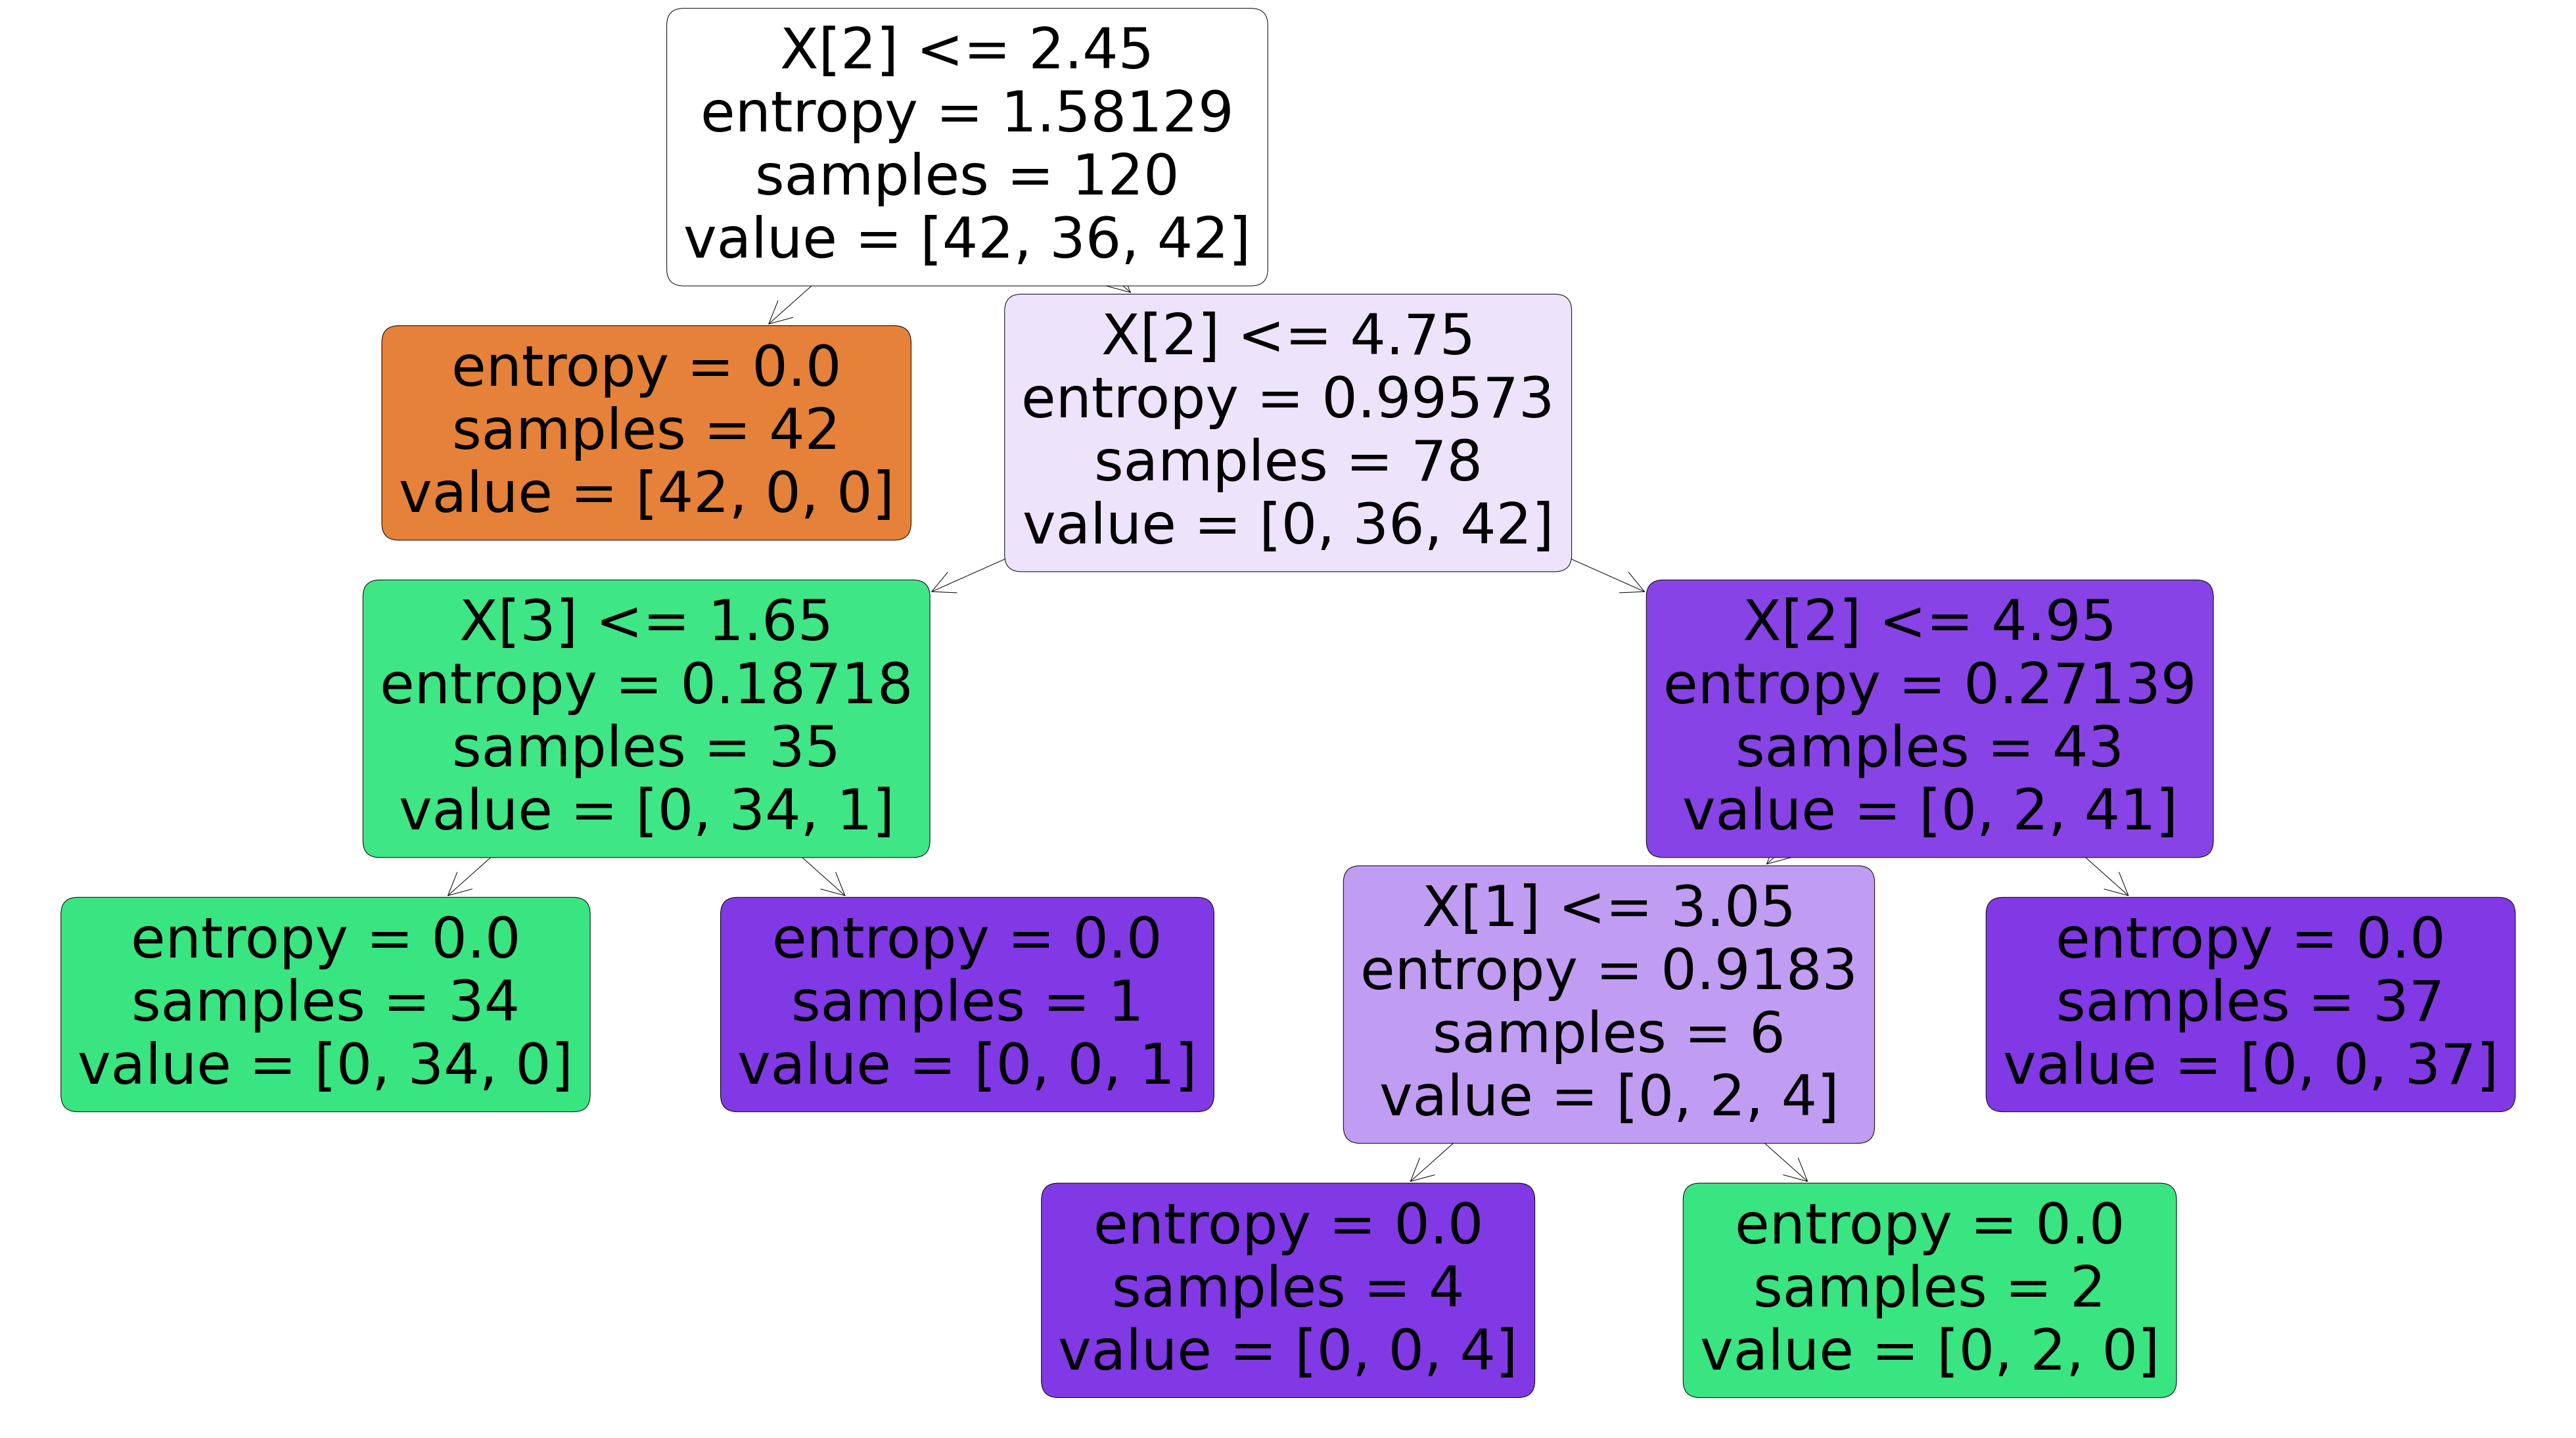

In [18]:
rcParams['figure.figsize'] = 70,40
plot_tree(classifier, precision=5, rounded=True, filled=True)
